#### Student: Tazhibay Aizhan
#### Group: Business Analytics and Big Data(2 course,English department,after college)
#### Tutor: Zhumadil Nurbol Abdirakhymuly
<h1 style="text-align: center;"><b> Final Exam Project </b></h1>

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [47]:
data = pd.read_excel('C:\\Users\\Айдана\\Downloads\\Final.xlsx',sheet_name="Final",skiprows=2,skipfooter=14,header=[0,1])

In [48]:
table1 = data.drop(columns={'Unnamed: 0_level_1','City.1'}, axis=1,level=1)
table1 = table1.drop(columns={'Client database'},axis=1,level=0)
client_database = data.drop(columns={'Unnamed: 0_level_0','Table 1','Sales Volume'},axis=1,level=0)

In [49]:
table1.set_index([('Sales Volume', 'Client Category'),('Sales Volume','City')],inplace=True)
table1.rename_axis(index=[('Client database', 'Client Category'),('Client database','City')],inplace=True)
table1.reset_index(inplace=True)
table1 =  table1[[('Table 1','Client code'),('Sales Volume','Jan'),('Sales Volume','Feb'),('Sales Volume','Mar'),('Sales Volume','Apr'),('Client database', 'Client Category'),
            ('Client database','City')]]

In [50]:
table1

Table 1 Sales Volume                 Client database     
   Client code          Jan   Feb  Mar  Apr Client Category City
0     Client 1          120   800  150  250             NaN  NaN
1    Client 14          300  1500  150  100             NaN  NaN
2    Client 13           90    40  200   60             NaN  NaN
3     Client 2            0  1500   30   40             NaN  NaN
4    Client 10          150   200  200  100             NaN  NaN
5     Client 7            0   300  400  500             NaN  NaN
6     Client 6          250   500  100    0             NaN  NaN
7     Client 3          240  1300  150  350             NaN  NaN
8     Client 4           20  3000   50   30             NaN  NaN
9    Client 11          150   200  200  100             NaN  NaN
10   Client 12           35   500   50  750             NaN  NaN
11   Client 18           30     0  300   50             NaN  NaN
12   Client 19           20   100   20   10             NaN  NaN
13   Client 17           20    80   20   80             NaN  NaN
14    Client 9           60  1000  200   60             NaN  NaN
15    Client 5            0   200  100  100             NaN  NaN
16    Client 8          100   300   50    0             NaN  NaN
17   Client 20          100   500   50  100             NaN  NaN
18   Client 16           30   250   30    0             NaN  NaN
19   Client 15          200   500   60  250             NaN  NaN

In [51]:
client_database

Client database                           
       Client code       City Client Category
0         Client 1     Almaty               A
1         Client 2  Karaganda               D
2         Client 3     Astana               B
3         Client 4  Karaganda               A
4         Client 5     Almaty               C
5         Client 6     Astana               B
6         Client 7     Atyrau               D
7         Client 8  Karaganda               B
8         Client 9     Astana               C
9        Client 10     Atyrau               C
10       Client 11   Shymkent               A
11       Client 12     Astana               A
12       Client 13   Shymkent               B
13       Client 14  Karaganda               D
14       Client 15   Pavlodar               C
15       Client 16   Shymkent               B
16       Client 17  Karaganda               D
17       Client 18     Almaty               B
18       Client 19   Pavlodar               C
19       Client 20   Pavlodar               B

In [52]:
table1 = table1.astype({('Client database', 'Client Category'): object, ('Client database', 'City'): object})

<h2><center> 1.	Задание</center> </h2>
Заполнить столбцы Table 1

•	Данные для столбца Client Category взять из таблицы Client Database

•	Данные для столбца City взять из таблицы Client Database

•	Отобразить готовую таблицу в таком же формате как и в excel файле


In [53]:
table1 = pd.merge(table1, client_database, how='inner',left_on=[('Table 1','Client code')],right_on =[('Client database','Client code')])

In [54]:
table1.drop(columns={('Client database_x', 'Client Category'),('Client database_x','City'),('Client database_y','Client code')}, axis=1,inplace=True)
table1.rename(columns={'Client database_y':''},inplace=True)

In [55]:
table1 = table1[[('Table 1','Client code'),('Sales Volume','Jan'), ('Sales Volume','Feb'),('Sales Volume','Mar'),
            ('Sales Volume','Apr'),('', 'Client Category'),('','City')]]
table1

Table 1 Sales Volume                                           
   Client code          Jan   Feb  Mar  Apr Client Category       City
0     Client 1          120   800  150  250               A     Almaty
1    Client 14          300  1500  150  100               D  Karaganda
2    Client 13           90    40  200   60               B   Shymkent
3     Client 2            0  1500   30   40               D  Karaganda
4    Client 10          150   200  200  100               C     Atyrau
5     Client 7            0   300  400  500               D     Atyrau
6     Client 6          250   500  100    0               B     Astana
7     Client 3          240  1300  150  350               B     Astana
8     Client 4           20  3000   50   30               A  Karaganda
9    Client 11          150   200  200  100               A   Shymkent
10   Client 12           35   500   50  750               A     Astana
11   Client 18           30     0  300   50               B     Almaty
12   Client 19           20   100   20   10               C   Pavlodar
13   Client 17           20    80   20   80               D  Karaganda
14    Client 9           60  1000  200   60               C     Astana
15    Client 5            0   200  100  100               C     Almaty
16    Client 8          100   300   50    0               B  Karaganda
17   Client 20          100   500   50  100               B   Pavlodar
18   Client 16           30   250   30    0               B   Shymkent
19   Client 15          200   500   60  250               C   Pavlodar

<h2><center> 2.	Задание</center> </h2>
Заполнить таблицу Table 2

•	Используя заполненный Table 1 посчитайте Sales Volume по Client Category на каждый месяц

•	Используя заполненный Table 1 посчитайте количество клиентов по каждой категории

•	Отобразить готовую таблицу в таком же формате как и в excel файле

•	Построить barplot: x-axis месяца, y-axis Sales Volume, категории Client Category


In [56]:
table2 = pd.read_excel('C:\\Users\\Айдана\\Downloads\\Final.xlsx',sheet_name="Final",skiprows=25,skipfooter=7,header=[0,1])

In [57]:
table2.drop(columns={'Unnamed: 0_level_1','Unnamed: 7_level_1','Unnamed: 8_level_1','Unnamed: 9_level_1','Unnamed: 10_level_1',
                    'Unnamed: 11_level_1'},level=1,inplace=True)

In [58]:
table2.rename(columns={'Unnamed: 6_level_1':''},level=1,inplace=True)

In [59]:
table2

Table 2 Sales Volume             Number of Clients
  Client Category          Jan Feb Mar Apr                  
0               A          NaN NaN NaN NaN               NaN
1               B          NaN NaN NaN NaN               NaN
2               C          NaN NaN NaN NaN               NaN
3               D          NaN NaN NaN NaN               NaN

In [60]:
table2[[('Sales Volume','Jan')]] = table2[[('Sales Volume','Jan')]].fillna(table1.groupby([('','Client Category')])[('Sales Volume','Jan'),].sum().reset_index())
table2[[('Sales Volume','Feb')]] = table2[[('Sales Volume','Feb')]].fillna(table1.groupby([('','Client Category')])[('Sales Volume','Feb'),].sum().reset_index())
table2[[('Sales Volume','Mar')]] = table2[[('Sales Volume','Mar')]].fillna(table1.groupby([('','Client Category')])[('Sales Volume','Mar'),].sum().reset_index())
table2[[('Sales Volume','Apr')]] = table2[[('Sales Volume','Apr')]].fillna(table1.groupby([('','Client Category')])[('Sales Volume','Apr'),].sum().reset_index())

In [61]:
table2

Table 2 Sales Volume                        Number of Clients
  Client Category          Jan     Feb    Mar     Apr                  
0               A        325.0  4500.0  450.0  1130.0               NaN
1               B        840.0  2890.0  880.0   560.0               NaN
2               C        430.0  2000.0  580.0   520.0               NaN
3               D        320.0  3380.0  600.0   720.0               NaN

In [62]:
number_ofclients = table1.groupby([('','Client Category')])[('Table 1','Client code'),].count().reset_index()

table2.iloc[0,5] = number_ofclients.iloc[0,1]
table2.iloc[1,5] = number_ofclients.iloc[1,1]
table2.iloc[2,5] = number_ofclients.iloc[2,1]
table2.iloc[3,5] = number_ofclients.iloc[3,1]

table2

Table 2 Sales Volume                        Number of Clients
  Client Category          Jan     Feb    Mar     Apr                  
0               A        325.0  4500.0  450.0  1130.0               4.0
1               B        840.0  2890.0  880.0   560.0               7.0
2               C        430.0  2000.0  580.0   520.0               5.0
3               D        320.0  3380.0  600.0   720.0               4.0

In [63]:
table2 = table2.astype({('Sales Volume', 'Jan'): int, ('Sales Volume', 'Feb'): int
                       ,('Sales Volume', 'Mar'): int,('Sales Volume', 'Apr'): int,('Number of Clients',''): int})

In [64]:
table2

Table 2 Sales Volume                  Number of Clients
  Client Category          Jan   Feb  Mar   Apr                  
0               A          325  4500  450  1130                 4
1               B          840  2890  880   560                 7
2               C          430  2000  580   520                 5
3               D          320  3380  600   720                 4

In [65]:
for_barplot = table2.drop(columns={('Number of Clients')},axis=1,level=0)
for_barplot = for_barplot.set_index([('Table 2', 'Client Category')])
for_barplot = for_barplot.T

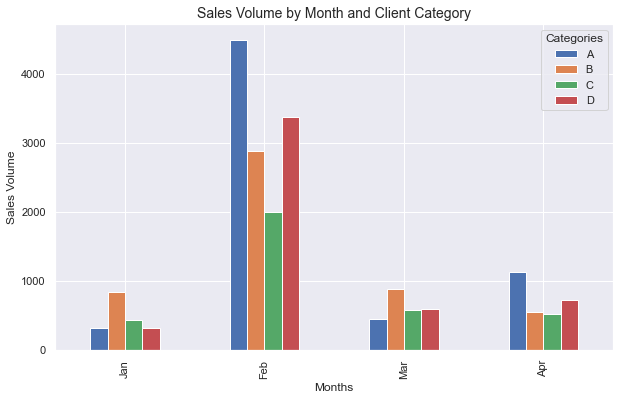

In [66]:
sns.set(style='darkgrid')
ax = for_barplot.plot(kind="bar",figsize=(10, 6))
labels=['Jan','Feb','Mar','Apr']
ax.set_xticklabels(labels)
plt.title("Sales Volume by Month and Client Category",fontsize=14)
plt.xlabel('Months')
plt.ylabel('Sales Volume')
plt.legend(title='Categories')



<h2><center> 3.	Задание</center> </h2>
Заполнить таблицу Table 3

•	Использую заполненный Table 2 посчитать SOM, % по формуле
Client Category Sales Volume / Сумму всех Client Category Sales Volume

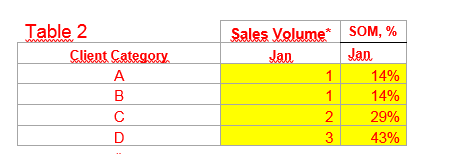

	       *(Sales Volume сгенерирован случайным образом и не имеет никакого отношения к реальным данным)

•	Отобразить готовую таблицу в таком же формате как и в excel файле

•	Построить pie chart по каждому месяцу отдельно. В pie chart показать SOM, % по Client Category


In [67]:
table3 = pd.read_excel('C:\\Users\\Айдана\\Downloads\\Final.xlsx',sheet_name="Final",skiprows=32,header=[0,1])

In [68]:
table3.drop(columns={'Unnamed: 0_level_0'},level=0,axis=1,inplace=True)
table3.drop(columns={'Apr.1','Apr.2','Apr.3','Apr.4','Apr.5','Apr.6'},level=1,axis=1,inplace=True)

In [69]:
table3[[('SOM, %','Jan')]] = ((table2[[('Sales Volume','Jan')]] / table2[[('Sales Volume','Jan')]].sum()) * 100).round(0).astype(int)
table3[[('SOM, %','Feb')]] = ((table2[[('Sales Volume','Feb')]] / table2[[('Sales Volume','Feb')]].sum()) * 100).round(0).astype(int)
table3[[('SOM, %','Mar')]] = ((table2[[('Sales Volume','Mar')]] / table2[[('Sales Volume','Mar')]].sum()) * 100).round(0).astype(int)
table3[[('SOM, %','Apr')]] = ((table2[[('Sales Volume','Apr')]] / table2[[('Sales Volume','Apr')]].sum()) * 100).round(0).astype(int)


In [76]:
table3

Table 3 SOM, %               
  Client Category    Jan  Feb  Mar  Apr
0               A    17%  35%  18%  39%
1               B    44%  23%  35%  19%
2               C    22%  16%  23%  18%
3               D    17%  26%  24%  25%

In [70]:
jan_pie = table3.groupby([('Table 3','Client Category')])[('SOM, %','Jan'),].sum()
feb_pie = table3.groupby([('Table 3','Client Category')])[('SOM, %','Feb'),].sum()
mar_pie = table3.groupby([('Table 3','Client Category')])[('SOM, %','Mar'),].sum()
apr_pie = table3.groupby([('Table 3','Client Category')])[('SOM, %','Apr'),].sum()

Text(0.5, 1.0, 'SOM in January: ')

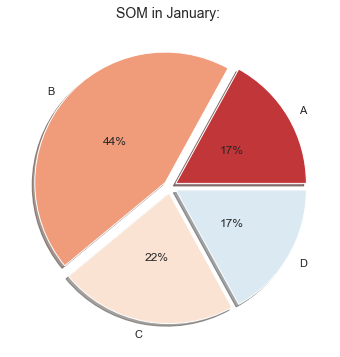

In [71]:
sns.set(style='darkgrid',palette='RdBu')
pie, ax = plt.subplots(figsize=[10,6])
labels = jan_pie.index.values
plt.pie(x=jan_pie[('SOM, %', 'Jan')].values,autopct='%.0f%%',explode=[0.05]*4, labels=labels, pctdistance=0.5,shadow=True)
plt.title("SOM in January: ", fontsize=14)

Text(0.5, 1.0, 'SOM in Febrary: ')

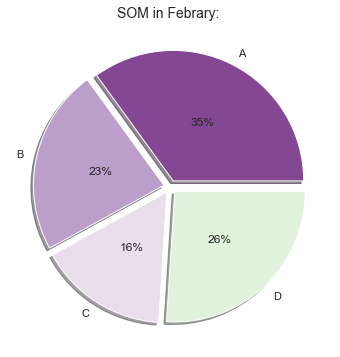

In [72]:
sns.set(style='darkgrid',palette='PRGn')
pie, ax = plt.subplots(figsize=[10,6])
labels = feb_pie.index.values
plt.pie(x=feb_pie[('SOM, %', 'Feb')].values,autopct='%.0f%%',explode=[0.05]*4, labels=labels, pctdistance=0.5,shadow=True)
plt.title("SOM in Febrary: ", fontsize=14)

Text(0.5, 1.0, 'SOM in March: ')

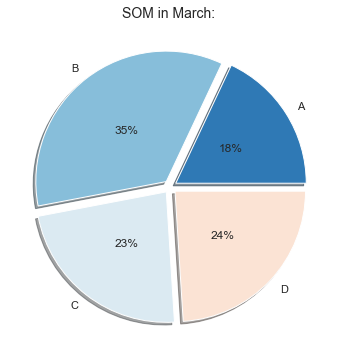

In [73]:
sns.set(style='darkgrid',palette='RdBu_r')
pie, ax = plt.subplots(figsize=[10,6])
labels = mar_pie.index.values
plt.pie(x=mar_pie[('SOM, %', 'Mar')].values,autopct='%.0f%%',explode=[0.05]*4, labels=labels, pctdistance=0.5,shadow=True)
plt.title("SOM in March: ", fontsize=14)

Text(0.5, 1.0, 'SOM in April: ')

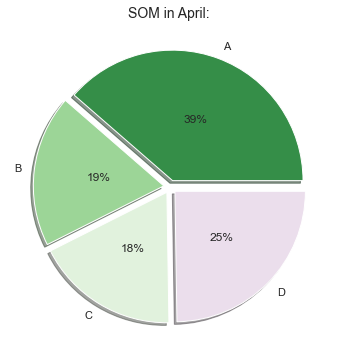

In [74]:
sns.set(style='darkgrid',palette='PRGn_r')
pie, ax = plt.subplots(figsize=[10,6])
labels = apr_pie.index.values
plt.pie(x=apr_pie[('SOM, %', 'Apr')].values,autopct='%.0f%%',explode=[0.05]*4, labels=labels, pctdistance=0.5,shadow=True)
plt.title("SOM in April: ", fontsize=14)

In [75]:
table3[[('SOM, %','Jan')]] = table3[[('SOM, %','Jan')]].astype(str) + '%'
table3[[('SOM, %','Feb')]] = table3[[('SOM, %','Feb')]].astype(str) + '%'
table3[[('SOM, %','Mar')]] = table3[[('SOM, %','Mar')]].astype(str) + '%'
table3[[('SOM, %','Apr')]] = table3[[('SOM, %','Apr')]].astype(str) + '%'

table3

Table 3 SOM, %               
  Client Category    Jan  Feb  Mar  Apr
0               A    17%  35%  18%  39%
1               B    44%  23%  35%  19%
2               C    22%  16%  23%  18%
3               D    17%  26%  24%  25%